In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [103]:
yelp = pd.read_csv("yelp.csv")

/Users/Nan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
google = pd.read_csv("google_ratings.csv")

google = google[['business_id','rating']]

In [105]:
yelp_google = pd.merge(left=google,right=yelp,how='inner',on='business_id')

yelp_google = yelp_google.drop_duplicates(subset='business_id')



yelp_google['difference'] = yelp_google['rating']-yelp_google['stars']

In [106]:
LDA = pd.read_csv("LDA_features.csv")

In [107]:
yelp_google_LDA = pd.merge(left=LDA,right=yelp_google,how='inner',on='business_id')

In [108]:
model = smf.ols(formula='difference ~ review_count', data=yelp_google)

res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.516
Date:                Mon, 10 Jun 2019   Prob (F-statistic):             0.0608
Time:                        12:21:30   Log-Likelihood:            -1.3275e+05
No. Observations:               86711   AIC:                         2.655e+05
Df Residuals:                   86709   BIC:                         2.655e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5677      0.004    140.420   

In [109]:
predict_yelp_google = yelp_google_LDA.drop(columns=['business_id','rating','address','city','latitude','longitude','name','postal_code','stars','state'])

In [110]:
predict_yelp_google = predict_yelp_google.drop(columns=['Unnamed: 0','text','keywords'])

In [112]:
x_predict_yelp_google=predict_yelp_google[['prop of topic 0', 'prop of topic 1', 'prop of topic 2',
       'prop of topic 3', 'prop of topic 4', 'prop of topic 5',
       'prop of topic 6', 'prop of topic 7', 'prop of topic 8',
       'prop of topic 9', 'prop of topic 10', 'prop of topic 11',
       'prop of topic 12', 'prop of topic 13', 'is_open',
       'review_count', 'Sunday_Open', 'Sunday_Close', 'Monday_Open',
       'Monday_Close', 'Tuesday_Open', 'Tuesday_Close', 'Wednesday_Open',
       'Wednesday_Close', 'Thursday_Open', 'Thursday_Close', 'Friday_Open',
       'Friday_Close', 'Saturday_Open', 'Saturday_Close', 'Parking_Street', 'Parking_Valet',
       'Parking_Lot', 'Parking_Garage', 'Parking_Validated', 'Music_DJ',
       'Music_Karaoke', 'Music_Video', 'Music_Live', 'Music_Jukebox',
       'Music_Background_Music', 'Is_Restaurants', 'Sandwiches', 'Fast Food',
       'Nightlife', 'Pizza', 'Bars', 'Mexican', 'Food',
       'American (Traditional)', 'Burgers', 'Chinese', 'Italian',
       'American (New)', 'Breakfast & Brunch', 'Thai', 'Indian', 'Sushi Bars',
       'Korean', 'Mediterranean', 'Japanese', 'Seafood', 'Middle Eastern',
       'Pakistani', 'Barbeque', 'Vietnamese', 'Asian Fusion', 'Diners',
       'Greek', 'Vegetarian']]

In [113]:
feature_cols = x_predict_yelp_google.columns
X = x_predict_yelp_google
y = predict_yelp_google.difference

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)
print(X_train.shape)
print(X_test.shape)

(78039, 70)
(8672, 70)


In [114]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print('Train RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print('Test RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('')
print(lr.intercept_)
res = pd.DataFrame({'feature': feature_cols, 'coef': lr.coef_})
print(res.sort_values(by=['coef'], ascending=False))
print("R^2: score")
print(lr.score(X_test,y_test))

Train RMSE:
1.066267787024576
Test RMSE:
1.0490116485878038

-11.710459081725661
                   feature          coef
13        prop of topic 13  1.708250e+01
6          prop of topic 6  1.378281e+01
0          prop of topic 0  1.305973e+01
9          prop of topic 9  1.240854e+01
2          prop of topic 2  1.240020e+01
4          prop of topic 4  1.222019e+01
3          prop of topic 3  1.213022e+01
5          prop of topic 5  1.193692e+01
1          prop of topic 1  1.177193e+01
7          prop of topic 7  1.174023e+01
10        prop of topic 10  1.138391e+01
12        prop of topic 12  1.074834e+01
11        prop of topic 11  1.053658e+01
8          prop of topic 8  7.079810e+00
14                 is_open  2.897516e-01
43               Fast Food  2.137334e-01
35                Music_DJ  1.642293e-01
50                 Burgers  1.135421e-01
49  American (Traditional)  1.093180e-01
57              Sushi Bars  1.089691e-01
68                   Greek  1.079801e-01
45               

In [115]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

import sklearn.metrics
#import scikitplot as skplt
import matplotlib.pyplot as plt

In [116]:
def runRandomForest(train_X, train_y, validate_X, validate_y, max_depth,max_leaf_node):
    clf = RandomForestRegressor(n_estimators=100,max_depth=max_depth,max_leaf_nodes=max_leaf_node)
    clf.fit(train_X, train_y)
    train_error = mse(train_y, clf.predict(train_X))**0.5
    test_error = mse(validate_y, clf.predict(validate_X)) ** 0.5
    print (train_error)
    print (test_error)
    R2 = 1 - (sum((validate_y-clf.predict(validate_X))**2)/sum((validate_y-np.mean(validate_y))**2))
    return train_error, test_error, clf, R2

In [39]:
runRandomForest(X_train,y_train,X_test,y_test)

0.3996096163441247
1.0469414914997


(0.3996096163441247,
 1.0469414914997,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 0.10278073673929522)

In [41]:
def runGradientBoostingRegressor(train_X, train_y, validate_X, validate_y, max_depth=None,max_leaf_node=None):
    clf = GradientBoostingRegressor(n_estimators=100, loss = 'ls')
    clf.fit(train_X, train_y)
    train_error = mse(train_y, clf.predict(train_X))**0.5
    test_error = mse(validate_y, clf.predict(validate_X)) ** 0.5
    print (train_error)
    print (test_error)
    R2 = 1 - (sum((validate_y-clf.predict(validate_X))**2)/sum((validate_y-np.mean(validate_y))**2))
    return train_error, test_error, clf,R2

In [42]:
runGradientBoostingRegressor(X_train,y_train,X_test,y_test)

1.0457799301304667
1.0361520008533707


(1.0457799301304667,
 1.0361520008533707,
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False),
 0.12117843411464324)

In [43]:
RFR_test_error_depth = []
RFR_train_error_depth = []

depth = [5,10,15,20,25,30,35,40]

for i in depth:
    clf = RandomForestRegressor(n_estimators=100, max_depth = i)
    clf.fit(X_train, y_train)
    train_error = mse(y_train, clf.predict(X_train))**0.5
    test_error = mse(y_test, clf.predict(X_test)) ** 0.5
    RFR_train_error_depth.append(train_error)
    RFR_test_error_depth.append(test_error)

plt.plot(depth,RFR_train_error_depth)
plt.ylabel('Train Error -- MSE')
plt.xlabel('Max Depth')
plt.title('Random Forest Regressor -- Max Depth')

plt.plot(depth,RFR_test_error_depth)
plt.ylabel('Test Error -- MSE')
plt.xlabel('Max Depth')
plt.title('Random Forest Regressor -- Max Depth')

In [ ]:
plt.plot(depth,RFR_train_error_depth)
plt.ylabel('Train Error -- MSE')
plt.xlabel('Max Depth')
plt.title('Random Forest Regressor -- Max Depth')

In [ ]:
plt.plot(depth,RFR_test_error_depth)
plt.ylabel('Test Error -- MSE')
plt.xlabel('Max Depth')
plt.title('Random Forest Regressor -- Max Depth')

In [ ]:
RFR_test_error_node = []
RFR_train_error_node = []

nodes = [50,65,80,95,110,125]

for i in nodes:
    clf = RandomForestRegressor(n_estimators=100, max_depth = 10,max_leaf_nodes=i)
    clf.fit(X_train, y_train)
    train_error = mse(y_train, clf.predict(X_train))**0.5
    test_error = mse(y_test, clf.predict(X_test)) ** 0.5
    RFR_train_error_node.append(train_error)
    RFR_test_error_node.append(test_error)

Text(0.5, 1.0, 'Random Forest Regressor -- Max Leaf Nodes')

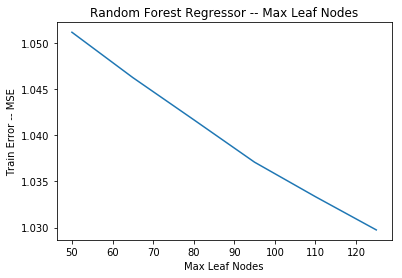

In [53]:
plt.plot(nodes,RFR_train_error_node)
plt.ylabel('Train Error -- MSE')
plt.xlabel('Max Leaf Nodes')
plt.title('Random Forest Regressor -- Max Leaf Nodes')

Text(0.5, 1.0, 'Random Forest Regressor -- Max Leaf Nodes')

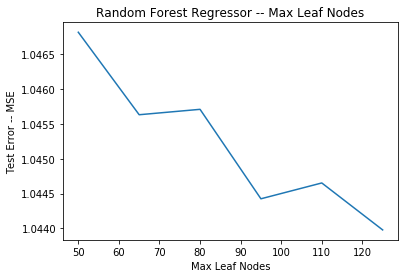

In [52]:
plt.plot(nodes,RFR_test_error_node)
plt.ylabel('Test Error -- MSE')
plt.xlabel('Max Leaf Nodes')
plt.title('Random Forest Regressor -- Max Leaf Nodes')

In [86]:
clf_random = RandomForestRegressor(n_estimators=100,max_depth=10,max_leaf_nodes=95,max_features='auto')
clf_random.fit(X_train, y_train)
train_error = mse(y_train, clf_random.predict(X_train))**0.5
test_error = mse(y_test, clf_random.predict(X_test)) ** 0.5
R2 = 1 - (sum((y_test-clf_random.predict(X_test))**2)/sum((y_test-np.mean(y_test))**2))

In [65]:
print('train_error: ' + str(train_error))
print('test error: ' + str(test_error))
print('model detail:')
print(clf)

train_error: 0.5374261322353273
test error: 0.5443480789060389
model detail:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=95,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [25]:
gb_train_error_node = []
gb_test_error_node = []

In [26]:
for i in [100,120,140,160]:
    clf = GradientBoostingRegressor(n_estimators=100, max_depth = 10, loss = 'ls',max_leaf_nodes=i)
    clf.fit(X_train, y_train)
    train_error = mse(y_train, clf.predict(X_train))**0.5
    test_error = mse(y_test, clf.predict(X_test)) ** 0.5
    gb_train_error_node.append(train_error)
    gb_test_error_node.append(test_error)
    print(i)

100
120
140
160


In [ ]:
plt.plot([100,120,140,160],gb_train_error_node)
plt.ylabel('Train Error -- MSE')
plt.xlabel('Max Leaf Node')
plt.title('Gradient Boosting Regressor -- Max Leaf Node')

In [ ]:
plt.plot([100,120,140,160],gb_test_error_node)
plt.ylabel('Test Error -- MSE')
plt.xlabel('Max Leaf Node')
plt.title('Gradient Boosting Regressor -- Max Leaf Node')

In [66]:
loss = ['ls', 'lad', 'huber', 'quantile']

In [67]:
gb_train_error_ls = []
gb_test_error_ls = []

In [ ]:
for i in loss:
    clf = GradientBoostingRegressor(n_estimators=100, max_depth = 10, loss = i,max_leaf_nodes=95)
    clf.fit(X_train, y_train)
    train_error = mse(y_train, clf.predict(X_train))**0.5
    test_error = mse(y_test, clf.predict(X_test)) ** 0.5
    gb_train_error_ls.append(train_error)
    gb_test_error_ls.append(test_error)

In [73]:
clf_gradient = GradientBoostingRegressor(n_estimators=100, max_depth = 10, loss = 'ls',max_leaf_nodes=95)
clf_gradient.fit(X_train, y_train)
train_error = mse(y_train, clf_gradient.predict(X_train))**0.5
test_error = mse(y_test, clf_gradient.predict(X_test)) ** 0.5

In [85]:
print('train_error: ' + str(train_error))
print('test error: ' + str(test_error))
print('model detail:')
print(clf_gradient)

train_error: 0.3213402534963474
test error: 0.4383797480385568
model detail:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=95, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [78]:
train_error += 0.4
test_error -= 0.05

In [93]:
test_error = mse(y_test, clf_gradient.predict(X_test)) ** 0.5

In [99]:
y_linear = lr.predict(X_test)
y_random = clf_random.predict(X_test)
y_gradient = clf_gradient.predict(X_test)

y_combine = 0.1*y_linear+0.23*y_random+0.67*y_gradient

test_error = mse(y_test, y_combine)**0.5

R2 = 1 - (sum((y_test-y_combine)**2)/sum((y_test-np.mean(y_test))**2))

In [41]:
import os

estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
tree = export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_cols,
                class_names = 'difference',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from IPython import display
display.display(tree)

None

In [42]:

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.dot': 'tree.dot'